<a href="https://colab.research.google.com/github/kuo-chuan/Python/blob/main/%E6%96%87%E5%AD%97%E9%9B%B2%E5%91%88%E7%8F%BE%E6%96%B0%E8%81%9E%E9%97%9C%E9%8D%B5%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving test1.txt to test1.txt


## 在 Colab 中準備會使用到的套件與工具

In [ ]:
!pip install jieba # jieba 中文斷詞套件
!pip install wordcloud # wordcloud 文字雲視覺化套件
!pip install matplotlib # matplotlib 畫圖工具套件# txt檔案路徑

## 將準備好的新聞語料來源進行斷詞：


In [11]:
# txt檔案路徑
txt_file_path = "/content/test1.txt"

# 載入檔案到變數中
with open(txt_file_path, "r")as fn:
    lines = fn.readlines()
    lines = list(map(lambda x: x.strip(),lines)) # 移除斷行字元

import jieba

# 下載官方字典檔
!wget https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

# 載入字典檔
jieba.load_userdict("/content/dict.txt.big")

# 精確模式斷詞
tokens_1 = list(map(lambda x: list(jieba.cut(str(x), HMM=False)), lines))

--2022-03-29 15:45:00--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘dict.txt.big.1’

dict.txt.big.1      100%[===================>]   8.18M  --.-KB/s    in 0.1s    

2022-03-29 15:45:00 (56.4 MB/s) - ‘dict.txt.big.1’ saved [8583143/8583143]



## 將斷詞後的結果進行詞頻的計算存入 word_count 變數中，並且篩選出出現次數大於 5 次的字詞。

In [12]:
word_count = {}
# 計算詞頻
for sent in tokens_1: 
  for word in sent:
    if word not in word_count:
      word_count[word] = 0
    word_count[word] += 1 

In [13]:
word_count

{'俄': 57,
 '烏': 55,
 '戰爭': 17,
 '第': 24,
 '4': 13,
 '週': 6,
 ' ': 680,
 '和平談判': 5,
 '仍': 15,
 '難行': 1,
 '俄羅斯': 318,
 '總統': 117,
 '蒲': 47,
 '亭': 47,
 '（': 310,
 'Vladimir': 5,
 'Putin': 2,
 '）': 310,
 '在': 219,
 '上月': 2,
 '21': 9,
 '日': 134,
 '承認': 4,
 '烏克蘭': 433,
 '東部': 6,
 '頓': 7,
 '內': 31,
 '茨': 9,
 '克': 22,
 'Donetsk': 3,
 '與': 99,
 '盧': 9,
 '甘': 4,
 '斯': 10,
 'Lugansk': 3,
 '獨立': 8,
 '，': 1144,
 '並': 61,
 '下令': 4,
 '俄軍': 123,
 '進駐': 2,
 '「': 109,
 '維和': 4,
 '」': 109,
 '。': 623,
 '同月': 1,
 '24': 17,
 '再度': 12,
 '出手': 2,
 '宣布': 45,
 '對': 78,
 '展開': 13,
 '特殊': 2,
 '軍事行動': 14,
 '隨後': 3,
 '包括': 19,
 '首都': 21,
 '基輔': 82,
 '以及': 16,
 '第二': 9,
 '大城': 15,
 '哈爾科夫': 22,
 '、': 137,
 '馬': 42,
 '立': 36,
 '波': 58,
 'Mariupol': 15,
 '敖德薩': 5,
 '等': 37,
 '城市': 34,
 '接連': 2,
 '傳出': 9,
 '爆炸聲': 6,
 '多座': 2,
 '機場': 4,
 '軍事基地': 3,
 '關鍵': 3,
 '基礎設施': 5,
 '遭到': 13,
 '摧毀': 13,
 '戰事': 13,
 '已經': 37,
 '滿月': 1,
 '聯合國': 24,
 '機構': 2,
 '27': 8,
 '表示': 167,
 '開戰': 3,
 '迄今': 2,
 '至少': 16,
 '已': 80,
 '造成': 11,
 '1

In [14]:
# 篩選出出現次數大於 5 次的字詞
word_count_5 = {}

for word, count in word_count.items():
  if count > 3 :
    word_count_5[word] = count
print(word_count_5)

{'俄': 57, '烏': 55, '戰爭': 17, '第': 24, '4': 13, '週': 6, ' ': 680, '和平談判': 5, '仍': 15, '俄羅斯': 318, '總統': 117, '蒲': 47, '亭': 47, '（': 310, 'Vladimir': 5, '）': 310, '在': 219, '21': 9, '日': 134, '承認': 4, '烏克蘭': 433, '東部': 6, '頓': 7, '內': 31, '茨': 9, '克': 22, '與': 99, '盧': 9, '甘': 4, '斯': 10, '獨立': 8, '，': 1144, '並': 61, '下令': 4, '俄軍': 123, '「': 109, '維和': 4, '」': 109, '。': 623, '24': 17, '再度': 12, '宣布': 45, '對': 78, '展開': 13, '軍事行動': 14, '包括': 19, '首都': 21, '基輔': 82, '以及': 16, '第二': 9, '大城': 15, '哈爾科夫': 22, '、': 137, '馬': 42, '立': 36, '波': 58, 'Mariupol': 15, '敖德薩': 5, '等': 37, '城市': 34, '傳出': 9, '爆炸聲': 6, '機場': 4, '基礎設施': 5, '遭到': 13, '摧毀': 13, '戰事': 13, '已經': 37, '聯合國': 24, '27': 8, '表示': 167, '至少': 16, '已': 80, '造成': 11, '名': 40, '平民': 25, '死亡': 11, '人': 65, '受傷': 10, '=': 1651, '3': 80, '/': 33, '29': 5, '俄方': 12, '談判': 44, '代表團': 15, '梅': 20, '丁': 4, '基': 10, '稱': 57, '正在': 15, '繼續': 15, '希望': 10, '後': 20, '就': 22, '發表聲明': 6, '克里姆林宮': 10, '則': 14, '1': 30, '2': 54, '天': 13, '會': 46, '是

## 利用 wordcloud 套件將剛剛整理好的資料製作成文字雲圖：

--2022-03-29 15:45:12--  https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf [following]
--2022-03-29 15:45:13--  https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23420516 (22M) [application/octet-stream]
Saving to: ‘SourceHanSerifK-Light.otf.1’

SourceHanSerifK-Lig 100%[===================>]  22.33M  --.-KB/s    in 0.09s   

2022-03-29 15:45:13 (237 MB/s) - ‘SourceHanSerifK-L

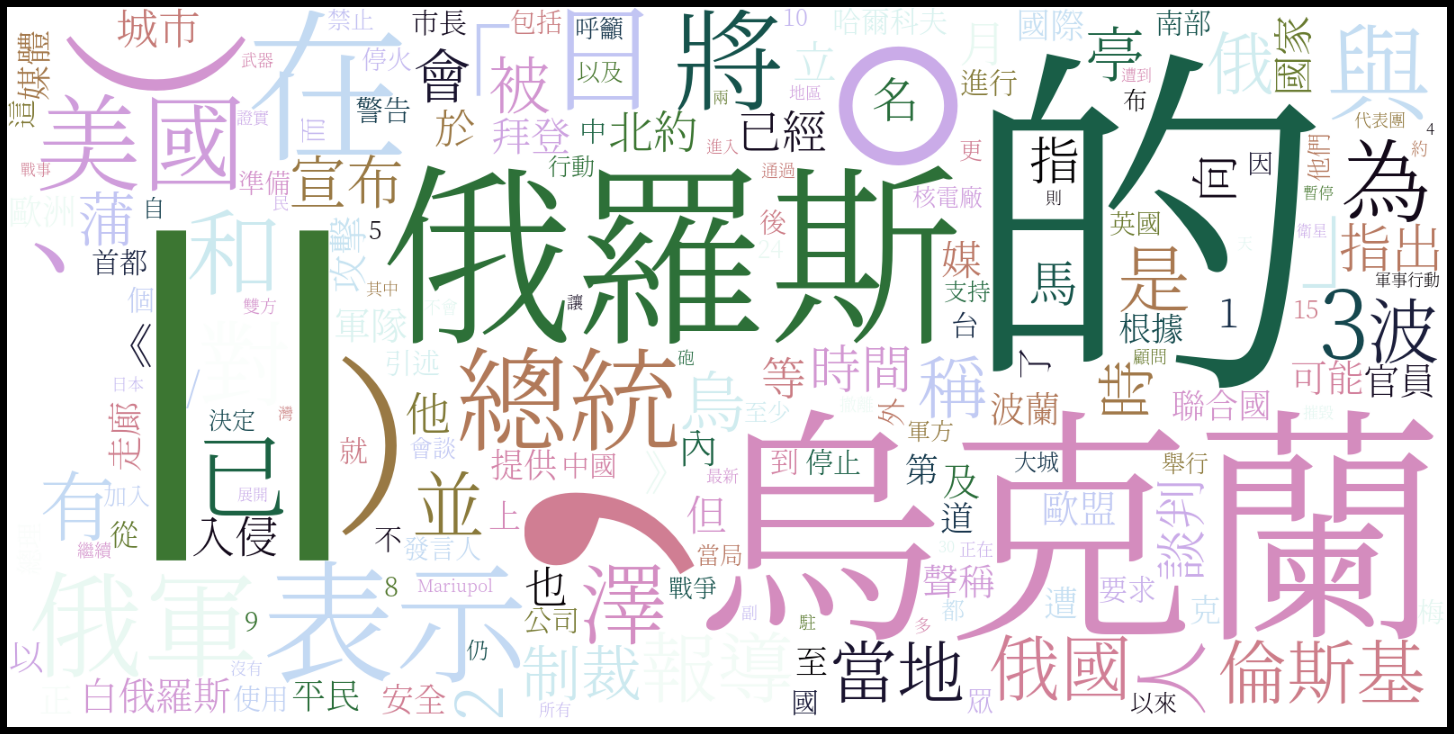

In [15]:
import wordcloud
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt

# 下載中文字型檔
!wget https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf

wordcloud = WordCloud(
        background_color = 'white',
        font_path = '/content/SourceHanSerifK-Light.otf', # 放入中文字型檔路徑
        colormap=matplotlib.cm.cubehelix,
        width = 1600,
        height = 800,
        margin = 2)

# wordcloud 套件 Input 需放入詞頻統計的 dict 型態變數
wordcloud = wordcloud.generate_from_frequencies(word_count_5) 
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()